# Assignment #1

Written by: 
* David Caban<br>
* Bronsin Jabraeili<br>
* Scott Jue<br>


For: MSDS 411 - Unsupervised Learning Methods<br>
Instructor: Dr. Joe Wilck<br>
Northwestern University<br>

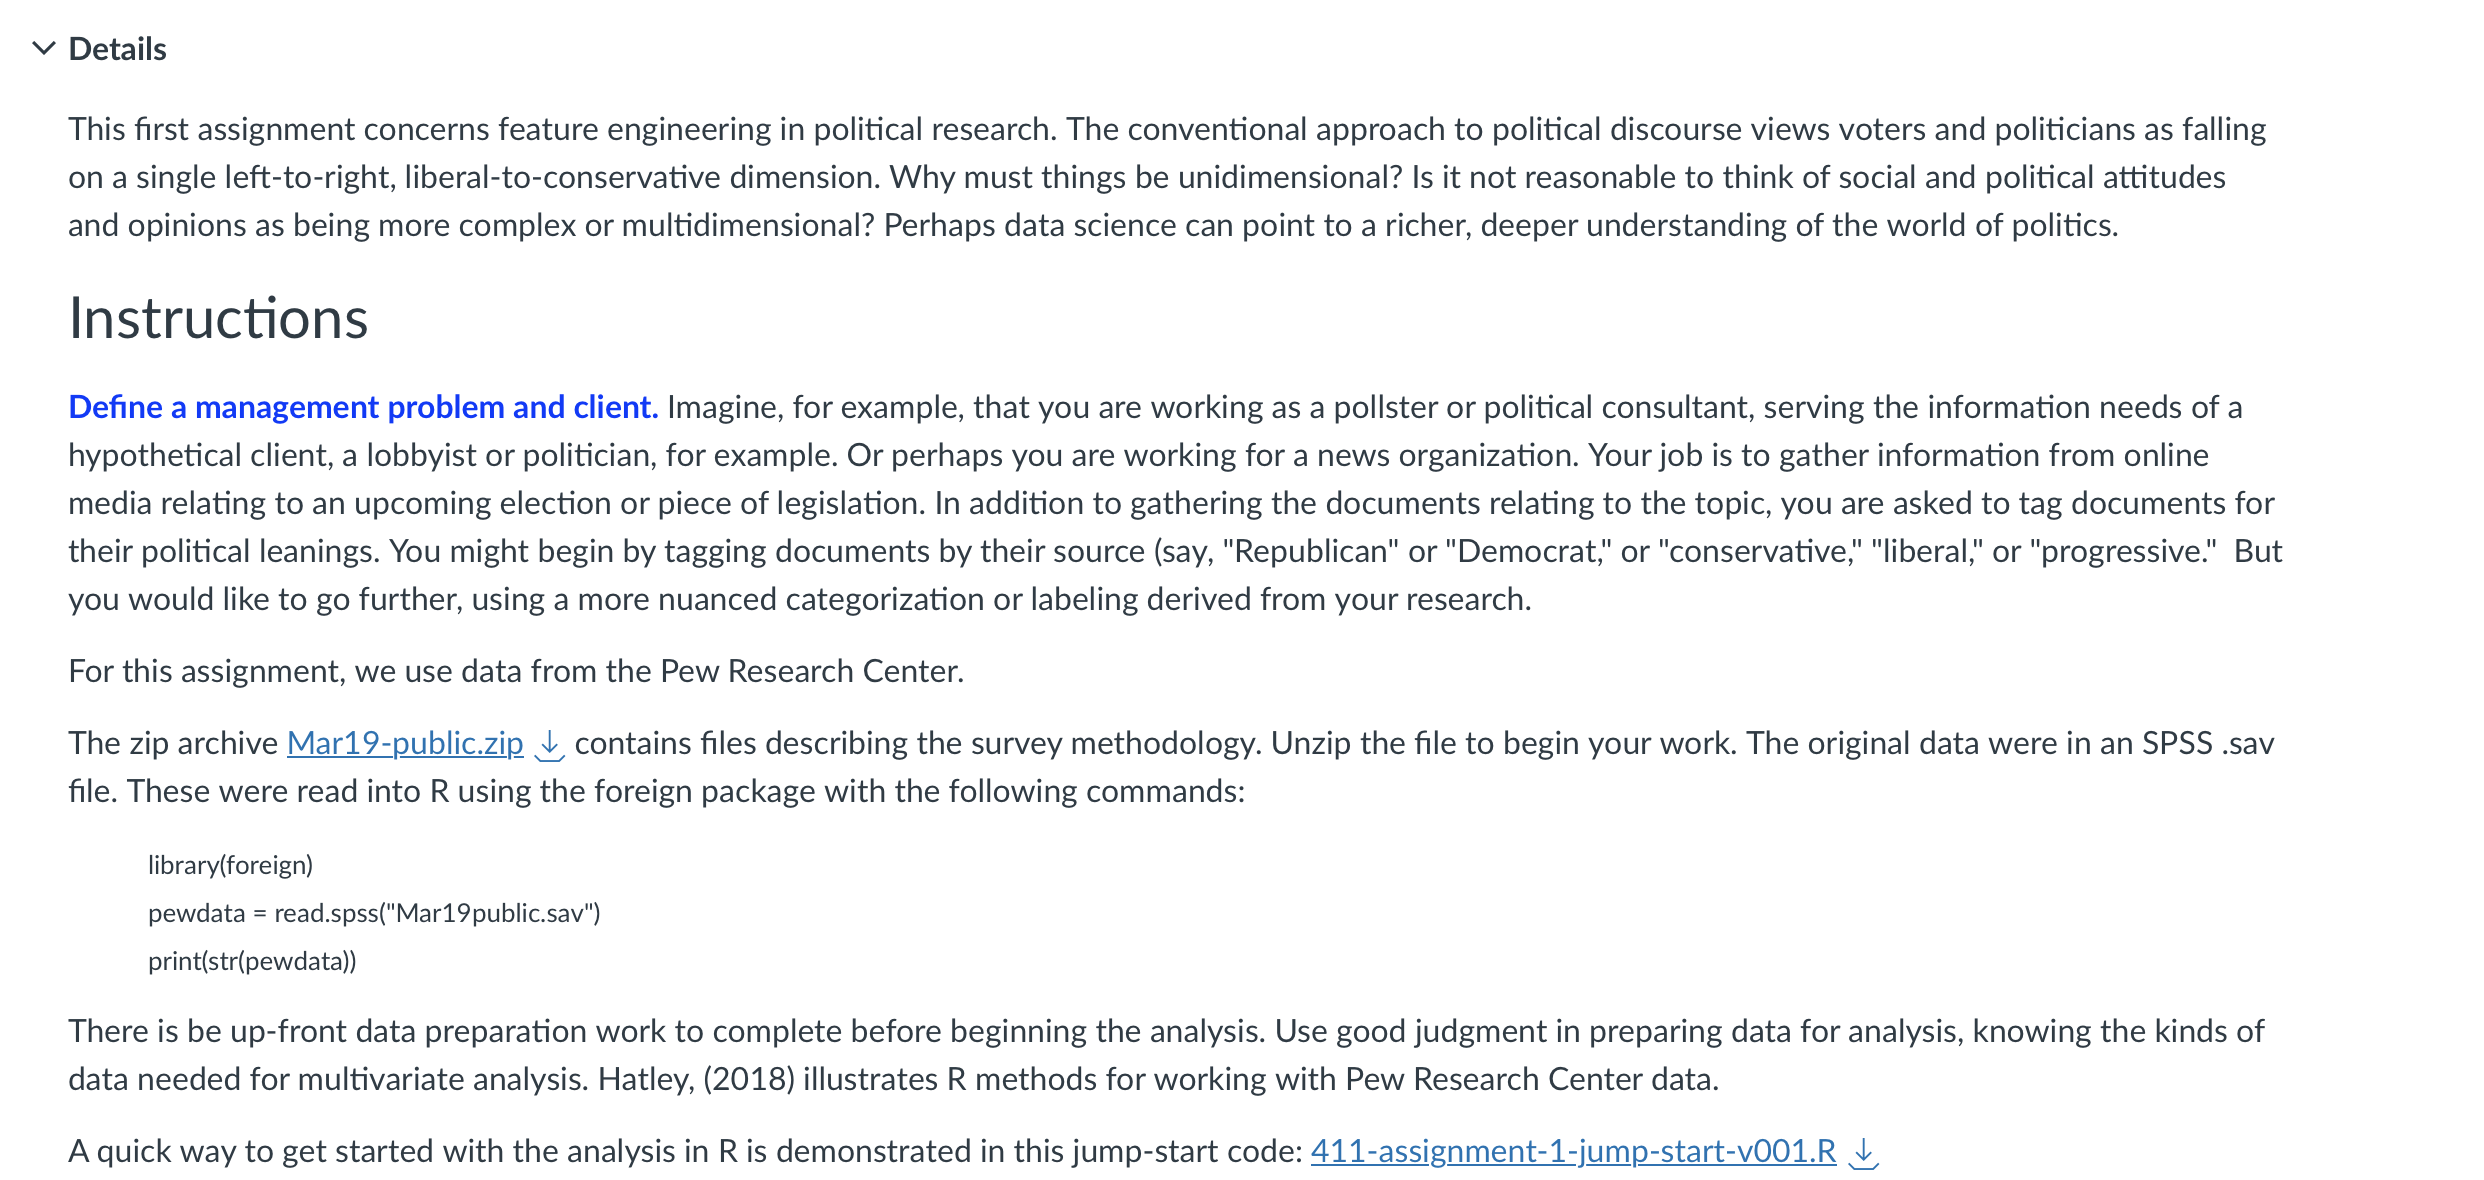

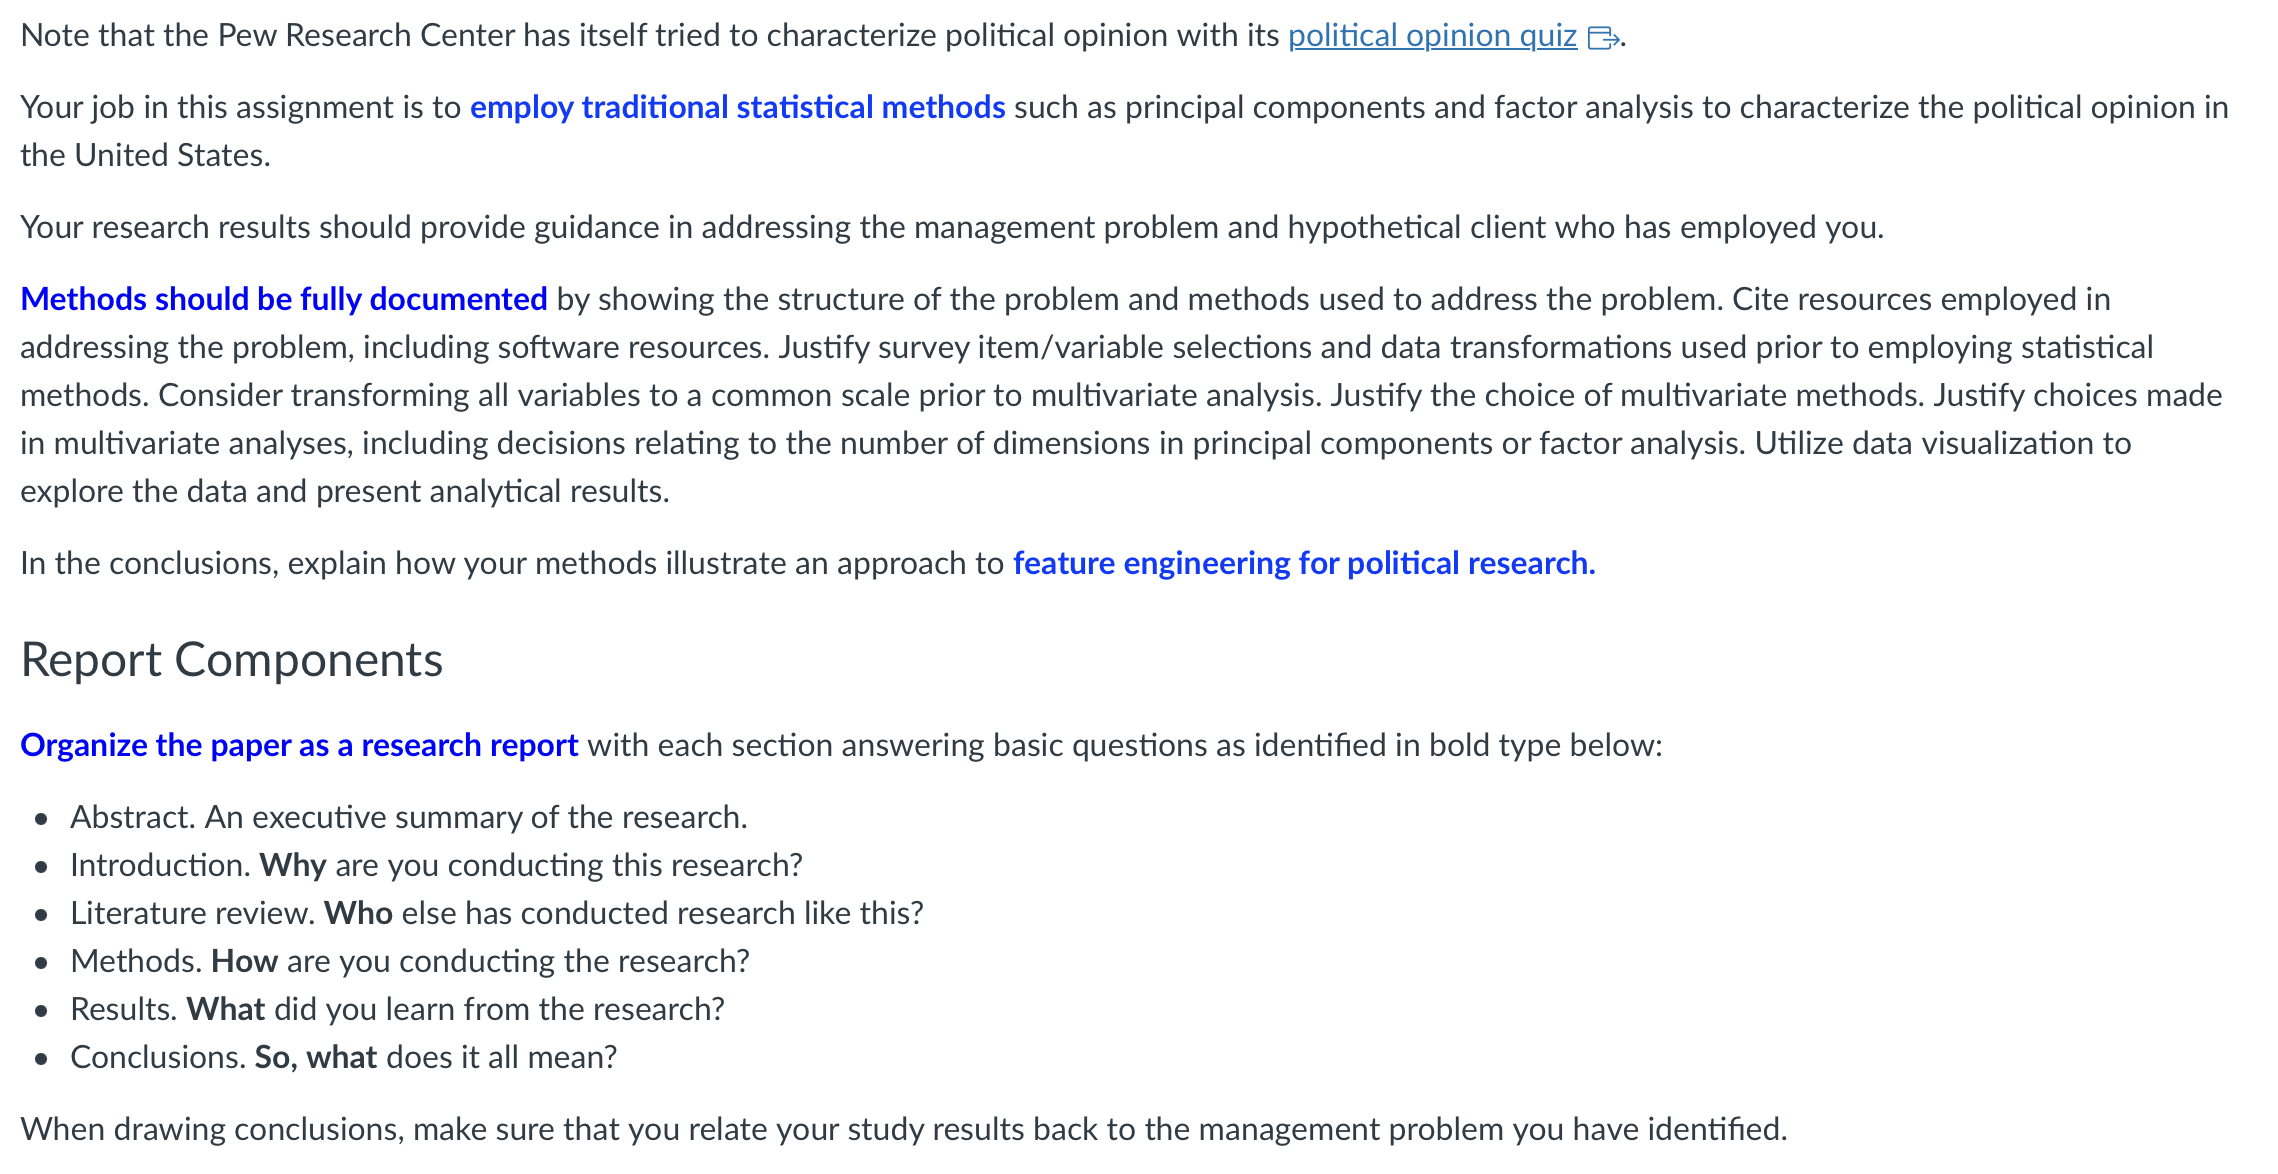

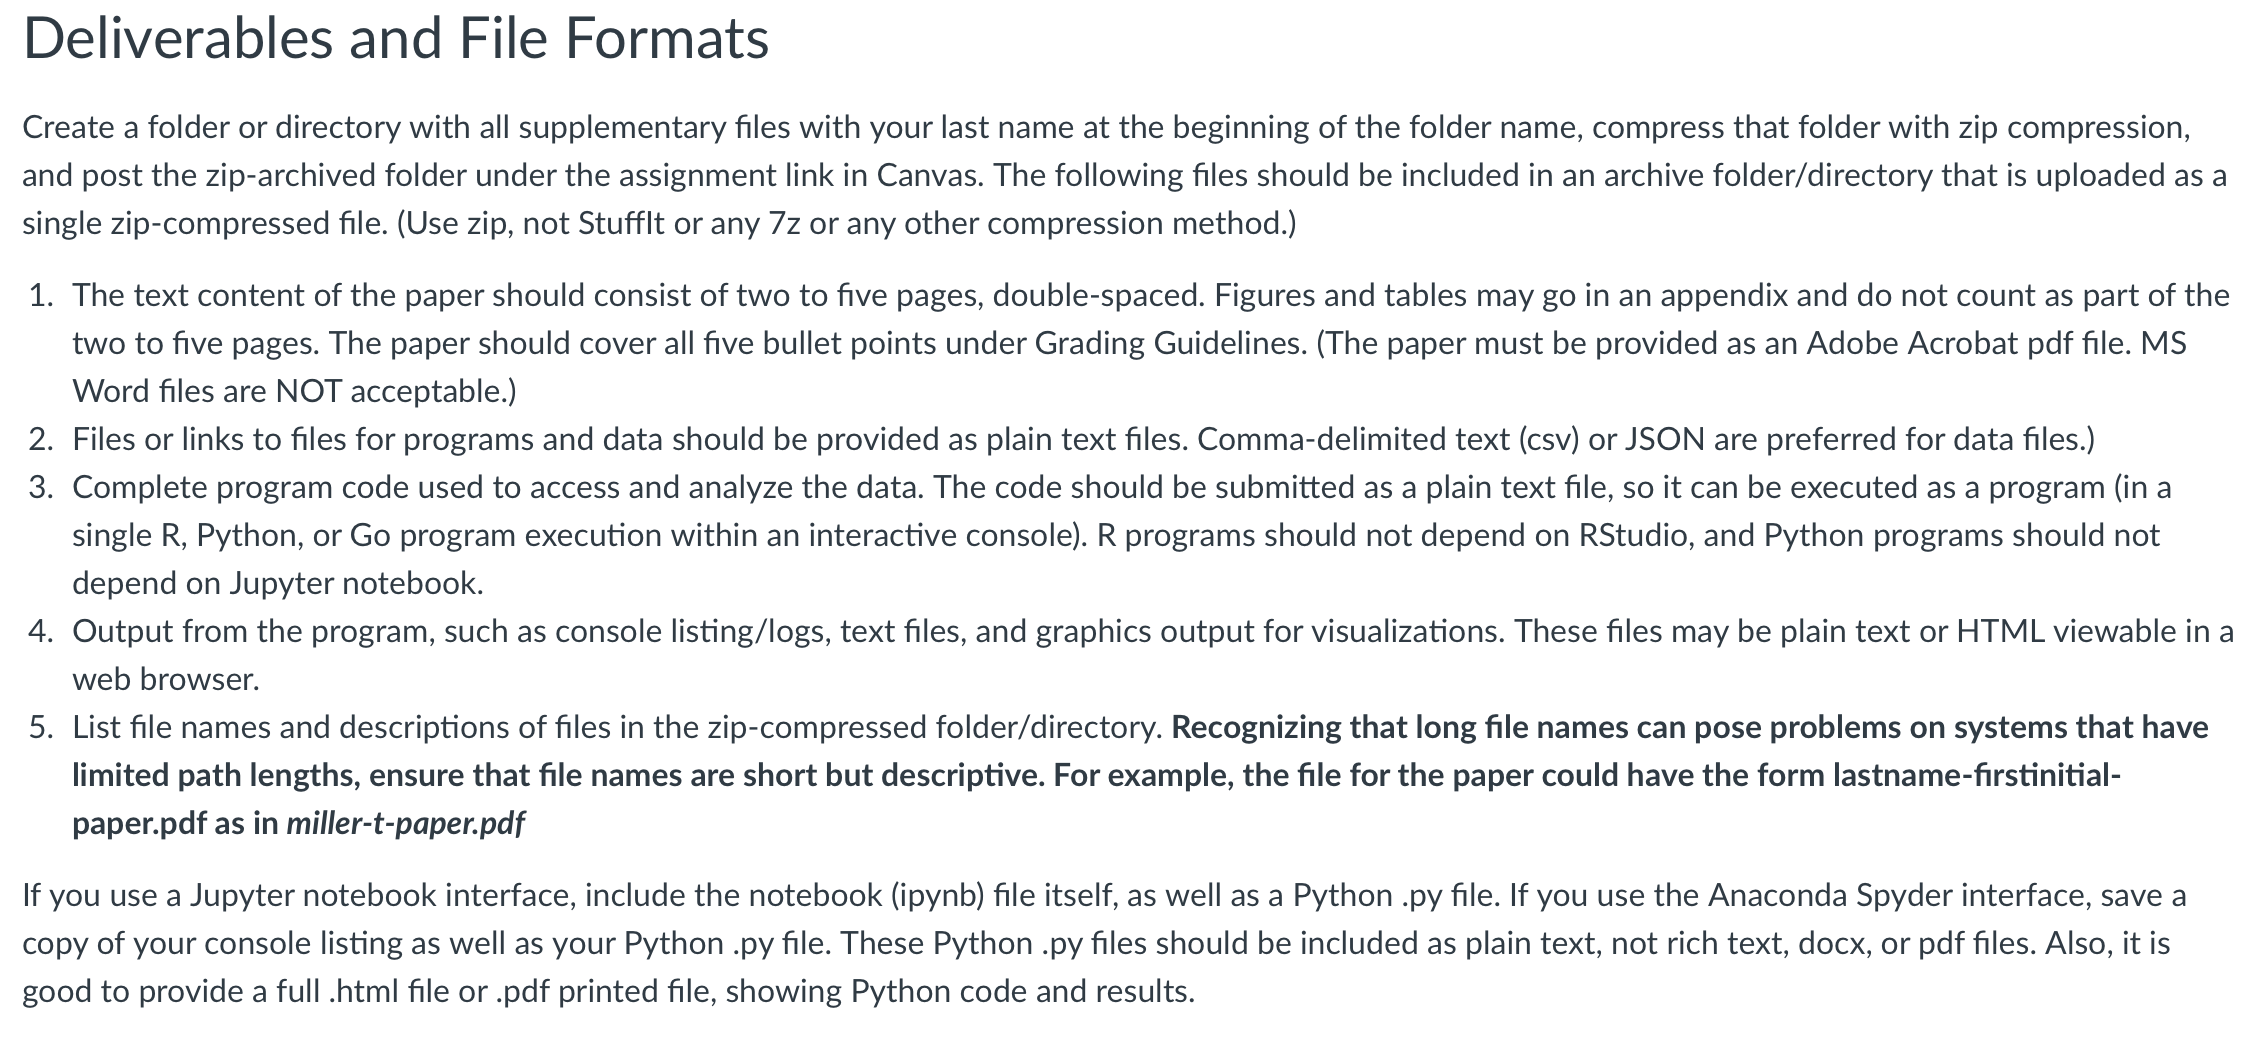

# Import Libraries

Use the power of R utilities for quick data preparation
prepared by Thomas W. Miller
initial version January 29, 2021

ensure that the foreign package has been installed
to run the jump-start code, type this into the console:
*   source("assignment-1-jump-start-v001.R")

In [2]:
install.packages("psych")
install.packages(c("foreign", "survey", "knitr"))
install.packages("corrplot")
install.packages("car")
install.packages("gt")


library(foreign)
library(survey)
library(knitr)
library(psych)
library(corrplot)
library(car)
library(tidyverse)
library(gt)

#library(lessR)
# begin by reading in character variables as factors
# there are a few warning messages regarding demographic items
# sdensity, age, hhl, and hh3
# but these items are not critical to the initial analysis
# we have planned for this assignment

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘minqa’, ‘numDeriv’, ‘mitools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘V8’, ‘reactR’, ‘bigD’, ‘bitops’, ‘htmlwidgets’, ‘juicyjuice’, ‘markdown’, ‘reactable’


Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


corrp

# Read in Data

In [ ]:
pewdata = read.spss("Mar19public.sav", use.value.labels = TRUE,
    to.data.frame = TRUE)
print(str(pewdata)) 

Warning message in read.spss("Mar19public.sav", use.value.labels = TRUE, to.data.frame = TRUE):
“Undeclared level(s) 2, 3, 4 added in variable: sdensity”
Warning message in read.spss("Mar19public.sav", use.value.labels = TRUE, to.data.frame = TRUE):
“Undeclared level(s) 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95 added in variable: age”
Warning message in read.spss("Mar19public.sav", use.value.labels = TRUE, to.data.frame = TRUE):
“Undeclared level(s) 1, 2, 3, 4, 5, 6, 7 added in variable: hh1”
Warning message in read.spss("Mar19public.sav", use.value.labels = TRUE, to.data.frame = TRUE):
“Undeclared level(s) 1, 2, 3, 4, 5, 6, 7 added in variable: hh3”


'data.frame':	1503 obs. of  129 variables:
 $ respid      : num  2 3 4 5 6 7 9 10 11 12 ...
 $ sample      : Factor w/ 2 levels "Landline","Cell phone": 1 1 1 1 1 1 1 1 1 1 ...
 $ int_date    : num  190320 190320 190320 190320 190320 ...
 $ fcall       : num  190320 190320 190320 190320 190320 ...
 $ attempt     : num  1 1 1 1 1 1 1 1 1 1 ...
 $ refusal     : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ lang        : Factor w/ 2 levels "English","Spanish": 1 1 1 1 1 1 1 1 1 1 ...
 $ cregion     : Factor w/ 4 levels "Northeast","Midwest",..: 1 1 3 3 2 1 3 2 3 1 ...
 $ state       : Factor w/ 58 levels "AL","AK","AZ",..: 33 39 10 34 23 39 34 36 41 20 ...
 $ usr         : chr  "U" "U" "S" "R" ...
 $ scregion    : Factor w/ 4 levels "Northeast","Midwest",..: 1 1 3 3 2 1 3 2 3 1 ...
 $ sstate      : Factor w/ 58 levels "AL","AK","AZ",..: 33 39 10 34 23 39 34 36 41 20 ...
 $ susr        : chr  "U" "U" "S" "R" ...
 $ sdensity    : Factor w/ 5 levels "Lowest","2","3",..: 3 5 3 1 1

In [ ]:
pewdata

respid,sample,int_date,fcall,attempt,refusal,lang,cregion,state,usr,⋯,hh1,hh3,adults,ql1,ql1a,qc1,ll,cp,money2,weight
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
2,Landline,190320,190320,1,No,English,Northeast,NY,U,⋯,2,2,2,"Yes, have cell phone",NA,NA,Landline,Cellphone,NA,1.1501120
3,Landline,190320,190320,1,No,English,Northeast,PA,U,⋯,1,NA,1,"No, do not",NA,NA,Landline,No cellphone,NA,2.0922217
4,Landline,190320,190320,1,No,English,South,FL,S,⋯,2,2,2,"Yes, have cell phone",NA,NA,Landline,Cellphone,NA,0.9633926
5,Landline,190320,190320,1,No,English,South,NC,R,⋯,2,2,2,"Yes, have cell phone",NA,NA,Landline,Cellphone,NA,0.4893587
6,Landline,190320,190320,1,No,English,Midwest,MI,R,⋯,4,3,3 or more,"Yes, have cell phone",NA,NA,Landline,Cellphone,NA,1.9300092
7,Landline,190320,190320,1,No,English,Northeast,PA,S,⋯,4,3,3 or more,"Yes, have cell phone",NA,NA,Landline,Cellphone,NA,1.0624115
9,Landline,190320,190320,1,No,English,South,NC,S,⋯,2,2,2,"Yes, have cell phone",NA,NA,Landline,Cellphone,NA,0.4634453
10,Landline,190320,190320,1,No,English,Midwest,OH,S,⋯,2,2,2,"Yes, have cell phone",NA,NA,Landline,Cellphone,NA,0.9324629
11,Landline,190320,190320,1,No,English,South,SC,R,⋯,2,2,2,"Yes, have cell phone",NA,NA,Landline,Cellphone,NA,0.4634453


# Exploratory Data Analysis

In [ ]:
nrow(pewdata)

[1] 1503

In [ ]:
ncol(pewdata)

[1] 129

In [ ]:
colnames(pewdata)

[1] "respid"       "sample"       "int_date"     "fcall"        "attempt"     
  [6] "refusal"      "lang"         "cregion"      "state"        "usr"         
 [11] "scregion"     "sstate"       "susr"         "sdensity"     "timezone"    
 [16] "comp"         "isex"         "irace1m1"     "irace1m2"     "irace1m3"    
 [21] "irace1m4"     "ihisp1"       "form"         "phtype"       "qs1"         
 [26] "q1"           "q2"           "q10af1"       "q10bf1"       "q14f2"       
 [31] "q19"          "q20"          "q25"          "q33af1"       "q33bf1"      
 [36] "q33cf1"       "q33df1"       "q33ff2"       "q33gf2"       "q33hf2"      
 [41] "q33if2"       "q33jf2"       "q34f1"        "q44af1"       "q44bf1"      
 [46] "q44cf1"       "q44ef1"       "q44ff1"       "q44gf1"       "q44hf2"      
 [51] "q44if2"       "q44jf2"       "q44kf2"       "q44lf2"       "q44mf2"      
 [56] "q44nf2"       "q47"          "q48f1"        "q49f2"        "q50a"        
 [61] "q50b"         "q50c"         "q50d"         "q50e"         "q50ff1"      
 [66] "q54f2"        "q55f1"        "q56f2"        "q57f2"        "q58"         
 [71] "q60"          "q61a"         "q61b"         "q61c"         "q61df1"      
 [76] "q61ef1"       "q61ff2"       "q61gf2"       "q61hf2"       "q61if1"      
 [81] "q64"          "q65a"         "q65b"         "q65c"         "q65d"        
 [86] "q65e"         "q66"          "q67"          "q68a"         "q68b"        
 [91] "q68d"         "q69"          "q70"          "q70a"         "q71"         
 [96] "q75"          "q76f1"        "q77f2"        "qi1"          "sex"         
[101] "age"          "educ"         "hisp"         "racecmb"      "racethn"     
[106] "birth_hisp"   "relig"        "chr"          "qf2"          "born"        
[111] "attend"       "income"       "reg"          "party"        "partyln"     
[116] "partysum"     "ideo"         "partyideo"    "partysumideo" "hh1"         
[121] "hh3"          "adults"       "ql1"          "ql1a"         "qc1"         
[126] "ll"           "cp"           "money2"       "weight"

In [ ]:
table(pewdata$party)


              Republican                 Democrat              Independent 
                     424                      425                      566 
     (VOL) No preference        (VOL) Other party (VOL) Don't know/Refused 
                      41                       12                       35 

In [ ]:
# check on column indices for political opinion variables
print(names(pewdata)[26]) # this is q1
print(names(pewdata)[98]) # this is q77f2

[1] "q1"
[1] "q77f2"


In [ ]:
# identifying the variables relating to political opinion
pewopinion = pewdata[,26:98] # covers q1 to q77f2

In [ ]:
head(pewopinion)

,q1,q2,q10af1,q10bf1,q14f2,q19,q20,q25,q33af1,q33bf1,⋯,q68a,q68b,q68d,q69,q70,q70a,q71,q75,q76f1,q77f2
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Dissatisfied,Disapprove,NA,NA,Approve,Some of the time,Frustrated,Only some of the time,NA,NA,⋯,(VOL) Don't know/Refused,Unfriendly toward religion,Friendly toward religion,(VOL) Don't know/Refused,Disapprove,Very strongly,Not at all well,A lot,NA,Definitely not done things that are unethical
2,Dissatisfied,Disapprove,NA,NA,(VOL) Don't know/Refused,Some of the time,Frustrated,(VOL) Never,NA,NA,⋯,(VOL) Don't know/Refused,Unfriendly toward religion,Unfriendly toward religion,Should express their views on day-to-day social and political questions,Disapprove,Very strongly,Not too well,A lot,NA,Definitely done things that are unethical
3,(VOL) Don't know/Refused,Approve,Approve,Disapprove,NA,Most of the time,Frustrated,Only some of the time,Trustworthy,Able to get things done,⋯,Friendly toward religion,Friendly toward religion,Neutral toward religion,Should express their views on day-to-day social and political questions,Approve,Not so strongly,Not too well,A lot,Probably not done things that are illegal [OR],NA
4,Satisfied,Approve,NA,NA,Disapprove,Most of the time,Angry,(VOL) Never,NA,NA,⋯,Unfriendly toward religion,Neutral toward religion,Neutral toward religion,Should express their views on day-to-day social and political questions,(VOL) Don't know/Refused,NA,Not at all well,A lot,NA,Probably not done things that are unethical [OR]
5,Dissatisfied,Disapprove,NA,NA,Approve,Most of the time,Frustrated,Only some of the time,NA,NA,⋯,Unfriendly toward religion,Unfriendly toward religion,Neutral toward religion,Should keep out of political matters,Disapprove,Very strongly,Very well,A lot,NA,Probably done things that are unethical
6,Satisfied,Approve,Approve,Disapprove,NA,Most of the time,Basically content,Only some of the time,Trustworthy,Able to get things done,⋯,Neutral toward religion,Neutral toward religion,Neutral toward religion,Should keep out of political matters,Approve,Not so strongly,Somewhat well,A little,Probably done things that are illegal,NA


In [ ]:
 # a quick check shows there are no complete cases across all opinion items
ok = complete.cases(pewopinion)
cat("\nNumber of original cases with complete data:", sum(ok))
cat("\nNumber of original cases with incomplete data:", sum(!ok))


Number of original cases with complete data: 0
Number of original cases with incomplete data: 1503

In [ ]:
# see if there is a subset of opinion items with complete data
item_complete = c() # initialize list of names of items
for (item in seq(along = names(pewopinion))) {
   if (sum(complete.cases(pewopinion[,item])) == nrow(pewopinion))
       item_complete = c(item_complete, names(pewopinion)[item])
}
cat("\n\nNumber of items with complete data:",length(item_complete)) 



Number of items with complete data: 30

In [ ]:
item_complete

[1] "q1"   "q2"   "q19"  "q20"  "q25"  "q47"  "q50a" "q50b" "q50c" "q50d"
[11] "q50e" "q58"  "q60"  "q61a" "q61b" "q61c" "q64"  "q65a" "q65b" "q65c"
[21] "q65d" "q65e" "q66"  "q68a" "q68b" "q68d" "q69"  "q70"  "q71"  "q75"

In [ ]:
# variable names for items with complete data
cat("\nNames of items with complete data:\n", item_complete)

# check status of working data frame including items with complete data
# looks like we have 30 multi-category factor items to work with
pewwork = pewopinion[,item_complete]
print(str(pewwork))


Names of items with complete data:
 q1 q2 q19 q20 q25 q47 q50a q50b q50c q50d q50e q58 q60 q61a q61b q61c q64 q65a q65b q65c q65d q65e q66 q68a q68b q68d q69 q70 q71 q75'data.frame':	1503 obs. of  30 variables:
 $ q1  : Factor w/ 3 levels "Satisfied","Dissatisfied",..: 2 2 3 1 2 1 1 2 2 2 ...
 $ q2  : Factor w/ 3 levels "Approve","Disapprove",..: 2 2 1 1 2 1 1 1 2 2 ...
 $ q19 : Factor w/ 5 levels "Most of the time",..: 2 2 1 1 1 1 1 2 1 1 ...
 $ q20 : Factor w/ 4 levels "Basically content",..: 2 2 2 3 2 1 3 1 2 2 ...
 $ q25 : Factor w/ 5 levels "Just about always",..: 3 4 3 4 3 3 4 2 3 3 ...
 $ q47 : Factor w/ 3 levels "Yes, keeping promises",..: 2 3 2 2 1 2 2 3 1 1 ...
 $ q50a: Factor w/ 4 levels "Statement #1",..: 2 1 2 2 1 2 2 2 1 1 ...
 $ q50b: Factor w/ 4 levels "Statement #1",..: 4 2 1 1 1 1 1 1 1 1 ...
 $ q50c: Factor w/ 4 levels "Statement #1",..: 2 2 2 2 1 2 1 1 1 1 ...
 $ q50d: Factor w/ 4 levels "Statement #1",..: 4 2 2 3 1 2 2 2 1 1 ...
 $ q50e: Factor w/ 4 levels "Statem

# Data Preparation

In [ ]:
# build design matrix formula from variable names in item_complete
design_string = paste("~ q1 + q2 + q19 + q20 + q25 + q47 + q50a + q50b +", 
"q50c + q50d + q50e + q58 + q60 + q61a + q61b +", 
"q61c + q64 + q65a + q65b + q65c + q65d + q65e +", 
"q66 + q68a + q68b + q68d + q69 + q70 + q71 + q75")

In [ ]:
# fast way to create binary indicator variables for all items with complete data
# this converts the 30 multi-category items into 100 binary indictor variables
pewmat = model.matrix(formula(design_string), data = pewwork)
print(str(pewmat))

 num [1:1503, 1:100] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:1503] "1" "2" "3" "4" ...
  ..$ : chr [1:100] "(Intercept)" "q1Dissatisfied" "q1(VOL) Don't know/Refused" "q2Disapprove" ...
 - attr(*, "assign")= int [1:100] 0 1 1 2 2 3 3 3 3 4 ...
 - attr(*, "contrasts")=List of 30
  ..$ q1  : chr "contr.treatment"
  ..$ q2  : chr "contr.treatment"
  ..$ q19 : chr "contr.treatment"
  ..$ q20 : chr "contr.treatment"
  ..$ q25 : chr "contr.treatment"
  ..$ q47 : chr "contr.treatment"
  ..$ q50a: chr "contr.treatment"
  ..$ q50b: chr "contr.treatment"
  ..$ q50c: chr "contr.treatment"
  ..$ q50d: chr "contr.treatment"
  ..$ q50e: chr "contr.treatment"
  ..$ q58 : chr "contr.treatment"
  ..$ q60 : chr "contr.treatment"
  ..$ q61a: chr "contr.treatment"
  ..$ q61b: chr "contr.treatment"
  ..$ q61c: chr "contr.treatment"
  ..$ q64 : chr "contr.treatment"
  ..$ q65a: chr "contr.treatment"
  ..$ q65b: chr "contr.treatment"
  ..$ q65c: chr "contr.treatment"
  ..$ q65

In [ ]:
pewmat

,(Intercept),q1Dissatisfied,q1(VOL) Don't know/Refused,q2Disapprove,q2(VOL) Don't know/Refused,q19Some of the time,q19Only now and then,q19Hardly at all,q19(VOL) Don't know/Refused,q20Frustrated,⋯,q69(VOL) Don't know/Refused,q70Disapprove,q70(VOL) Don't know/Refused,q71Somewhat well,q71Not too well,q71Not at all well,q71(VOL) Don't know/Refused,q75A little,q75Nothing at all,q75(VOL) Don't know/Refused
1,1,1,0,1,0,1,0,0,0,1,⋯,1,1,0,0,0,1,0,0,0,0
2,1,1,0,1,0,1,0,0,0,1,⋯,0,1,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,⋯,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,0
5,1,1,0,1,0,0,0,0,0,1,⋯,0,1,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
7,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,1,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,0
9,1,1,0,1,0,0,0,0,0,1,⋯,0,1,0,0,0,0,0,0,0,0
10,1,1,0,1,0,0,0,0,0,1,⋯,0,1,0,0,0,0,0,0,0,0


In [ ]:
pewdf = as.data.frame(pewmat)
print(str(pewdf))

'data.frame':	1503 obs. of  100 variables:
 $ (Intercept)                                                               : num  1 1 1 1 1 1 1 1 1 1 ...
 $ q1Dissatisfied                                                            : num  1 1 0 0 1 0 0 1 1 1 ...
 $ q1(VOL) Don't know/Refused                                                : num  0 0 1 0 0 0 0 0 0 0 ...
 $ q2Disapprove                                                              : num  1 1 0 0 1 0 0 0 1 1 ...
 $ q2(VOL) Don't know/Refused                                                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ q19Some of the time                                                       : num  1 1 0 0 0 0 0 1 0 0 ...
 $ q19Only now and then                                                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ q19Hardly at all                                                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ q19(VOL) Don't know/Refused                                               : num  0 0 0 0 0

# PCA/EFA? Both?

Now we are ready to try principal components or factor analysis or whatever using the matrix pewmat or the data frame pewdf

Of course, we may want to review the items in the matrix or data frame, ensuring that they make sense for input to our analysis.

We may want to attend to individual items,recoding items where appropriate (with recode from the CAR package), eliminating selected items, or whatever makes sense.

In [ ]:
head(pewdf)

,(Intercept),q1Dissatisfied,q1(VOL) Don't know/Refused,q2Disapprove,q2(VOL) Don't know/Refused,q19Some of the time,q19Only now and then,q19Hardly at all,q19(VOL) Don't know/Refused,q20Frustrated,⋯,q69(VOL) Don't know/Refused,q70Disapprove,q70(VOL) Don't know/Refused,q71Somewhat well,q71Not too well,q71Not at all well,q71(VOL) Don't know/Refused,q75A little,q75Nothing at all,q75(VOL) Don't know/Refused
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0,1,0,1,0,0,0,1,⋯,1,1,0,0,0,1,0,0,0,0
2,1,1,0,1,0,1,0,0,0,1,⋯,0,1,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,⋯,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,0
5,1,1,0,1,0,0,0,0,0,1,⋯,0,1,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0


In [ ]:
# remove variables with NA values in correlation matrix
to_remove <- c("(Intercept)", "q69(VOL) Other/Depends")
pewdf2 <- pewdf[ , !(names(pewdf) %in% to_remove)]

In [ ]:
# create correlation matrix
df_cor <- cor(pewdf2)

In [ ]:
df_cor

,q1Dissatisfied,q1(VOL) Don't know/Refused,q2Disapprove,q2(VOL) Don't know/Refused,q19Some of the time,q19Only now and then,q19Hardly at all,q19(VOL) Don't know/Refused,q20Frustrated,q20Angry,⋯,q69(VOL) Don't know/Refused,q70Disapprove,q70(VOL) Don't know/Refused,q71Somewhat well,q71Not too well,q71Not at all well,q71(VOL) Don't know/Refused,q75A little,q75Nothing at all,q75(VOL) Don't know/Refused
q1Dissatisfied,1.000000000,-0.309964965,0.501939950,-0.074091756,0.001604035,0.005120561,-0.077384110,-0.026786347,0.134939531,0.1539675863,⋯,0.013674558,0.450285348,-0.032183805,-0.009611996,0.032666029,0.032214958,-0.0216820687,-0.116835613,-0.068823429,-0.077246391
q1(VOL) Don't know/Refused,-0.309964965,1.000000000,-0.071144975,0.121738301,0.025618790,0.010013350,0.054288735,0.068440101,-0.005298403,-0.0973871349,⋯,0.033184137,-0.100365843,0.076155049,-0.007789926,0.004898414,0.014256293,0.0906661085,-0.007742510,-0.009009767,0.115036460
q2Disapprove,0.501939950,-0.071144975,1.000000000,-0.236741406,0.065596977,0.050993103,-0.053740857,-0.033050605,0.086252155,0.0684606766,⋯,0.011657918,0.690549861,-0.060155854,-0.015554628,0.037429173,0.079920893,-0.0475065115,-0.066446430,-0.106467937,-0.059354496
q2(VOL) Don't know/Refused,-0.074091756,0.121738301,-0.236741406,1.000000000,0.030342020,0.089527373,0.162426019,0.076170433,-0.050003920,-0.0548738858,⋯,0.042769590,-0.066663043,0.132862347,0.032673157,0.030521901,0.038501954,-0.0017425046,0.052464686,0.044204589,0.090391115
q19Some of the time,0.001604035,0.025618790,0.065596977,0.030342020,1.000000000,-0.149484390,-0.120233637,-0.033803430,0.055227465,-0.0830232936,⋯,0.016441447,-0.016721787,0.112567125,0.099842194,0.095915403,0.025610087,0.0019944391,0.163152417,0.018465000,-0.003125163
q19Only now and then,0.005120561,0.010013350,0.050993103,0.089527373,-0.149484390,1.000000000,-0.073598125,-0.020691955,-0.055264310,-0.0386919512,⋯,-0.057264605,0.048432326,0.098130871,-0.042183239,0.092172624,0.127917465,0.0301067409,0.090400032,0.065513964,0.002192567
q19Hardly at all,-0.077384110,0.054288735,-0.053740857,0.162426019,-0.120233637,-0.073598125,1.000000000,-0.016643002,-0.134499730,0.0091123294,⋯,0.064881472,-0.036510364,0.167690594,-0.074142762,0.058750261,0.124280467,0.0906661085,0.104317412,0.204581395,0.013090824
q19(VOL) Don't know/Refused,-0.026786347,0.068440101,-0.033050605,0.076170433,-0.033803430,-0.020691955,-0.016643002,1.000000000,-0.041116554,-0.0353647433,⋯,0.147460038,-0.024953491,0.056504041,-0.031020510,-0.005111535,0.006585881,-0.0145432161,0.031752110,-0.014543216,0.223420902
q20Frustrated,0.134939531,-0.005298403,0.086252155,-0.050003920,0.055227465,-0.055264310,-0.134499730,-0.041116554,1.000000000,-0.6102552035,⋯,-0.053683481,0.039838997,-0.040383559,0.032208114,0.022868886,-0.069974800,0.0076864920,-0.054290711,-0.118319910,-0.038045506
q20Angry,0.153967586,-0.097387135,0.068460677,-0.054873886,-0.083023294,-0.038691951,0.009112329,-0.035364743,-0.610255204,1.0000000000,⋯,0.009214767,0.103710704,-0.045511388,-0.035031152,-0.018211713,0.048300747,-0.0297397131,-0.083131574,0.050437487,0.013010625


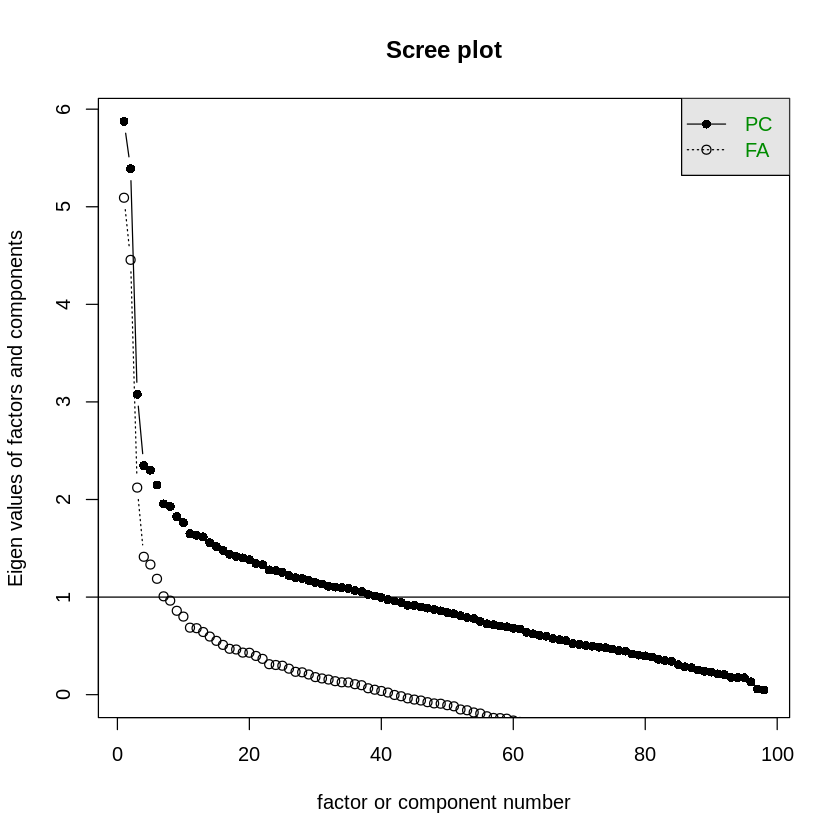

In [ ]:
# create scree plot using correlation 
scree(df_cor)

# PCA

In [ ]:
pc1<-principal(df_cor,nfactors=40,rotate="none",scores=TRUE)
pc1
pc1$scores

Principal Components Analysis
Call: principal(r = df_cor, nfactors = 40, rotate = "none", scores = TRUE)
Standardized loadings (pattern matrix) based upon correlation matrix
                                                                             PC1
q1Dissatisfied                                                             -0.55
q1(VOL) Don't know/Refused                                                  0.20
q2Disapprove                                                               -0.76
q2(VOL) Don't know/Refused                                                  0.19
q19Some of the time                                                        -0.05
q19Only now and then                                                        0.00
q19Hardly at all                                                            0.13
q19(VOL) Don't know/Refused                                                 0.16
q20Frustrated                                                              -0.16
q20Angry        

NULL

Parallel analysis suggests that the number of factors =  37  and the number of components =  29 


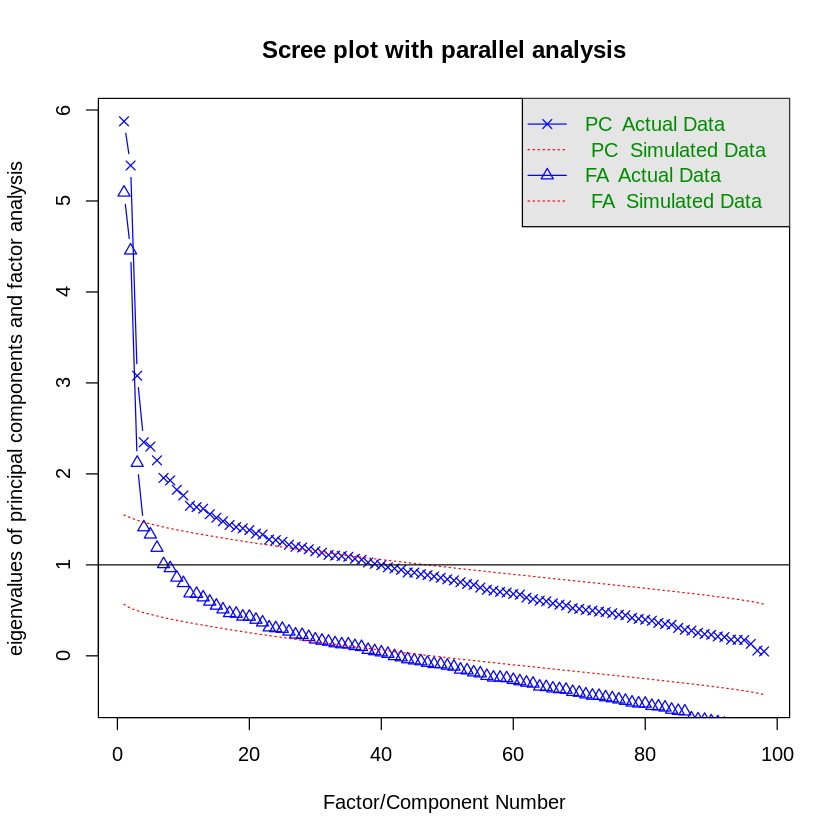

In [ ]:
# scree plot
fa.parallel(df_cor, n.obs=1503, fa="both", n.iter=100,show.legend=TRUE,main="Scree plot with parallel analysis")

# Factor Analysis

In [ ]:
# nfactors=10, rotate=none, fm=pa
fa1<-fa(pewdf2, nfactors=10, rotate="none", fm="pa")
fa1

maximum iteration exceeded

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”


Factor Analysis using method =  pa
Call: fa(r = pewdf2, nfactors = 10, rotate = "none", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
                                                                             PA1
q1Dissatisfied                                                             -0.53
q1(VOL) Don't know/Refused                                                  0.17
q2Disapprove                                                               -0.78
q2(VOL) Don't know/Refused                                                  0.16
q19Some of the time                                                        -0.04
q19Only now and then                                                        0.00
q19Hardly at all                                                            0.11
q19(VOL) Don't know/Refused                                                 0.13
q20Frustrated                                                              -0.14
q20Angry              

In [ ]:
Z<-eigen(df_cor)
Z$val
Z$vec

[1] 5.87543273 5.38994879 3.07887621 2.34743780 2.30049641 2.14866101
 [7] 1.95541774 1.92896597 1.82491265 1.76324009 1.64930470 1.63435408
[13] 1.61741876 1.55664829 1.51816416 1.47888769 1.43839865 1.41494354
[19] 1.40132432 1.38214501 1.34348362 1.33279939 1.27842178 1.27204844
[25] 1.25310100 1.22103157 1.19924964 1.19134878 1.17155936 1.14946468
[31] 1.13357855 1.10953712 1.10251563 1.09686219 1.08882411 1.06670978
[37] 1.05660815 1.02627474 1.01138292 0.99607332 0.97318043 0.95991191
[43] 0.94516824 0.91609764 0.91467562 0.89790576 0.88759816 0.87275851
[49] 0.85847007 0.84112840 0.82921278 0.80941973 0.78981236 0.78051649
[55] 0.75019707 0.72613403 0.71663823 0.70325610 0.69538372 0.68011671
[61] 0.67302007 0.64002675 0.62370170 0.60703885 0.59969086 0.57643328
[67] 0.56297763 0.55366677 0.52362173 0.51579368 0.50410601 0.49704299
[73] 0.48615643 0.48050514 0.46842663 0.45162143 0.44591994 0.41753731
[79] 0.40610450 0.39731571 0.38596867 0.36201297 0.34909986 0.34156822
[85] 0.30698979 0.28578881 0.27711704 0.25351442 0.23893336 0.23148822
[91] 0.21266394 0.20623010 0.17793044 0.17567217 0.17327989 0.13143770
[97] 0.05803074 0.04813094

0.226597837,0.100673526,-0.002838008,0.1776782909,-0.0108569581,-0.013472772,-0.038737983,0.0638690513,-0.00825095,0.080246730,⋯,0.149452809,0.099471123,-0.1609321795,0.016127124,-0.026261484,0.0289809943,-0.0177925432,0.0335843836,-0.023722004,-0.005319614
-0.083453544,0.036627632,-0.017783656,-0.1161269779,-0.0607273256,0.018399249,0.030256053,0.0098213415,0.07185552,-0.067832414,⋯,-0.019998398,0.043762274,-0.0706139906,0.005822592,-0.005653218,0.0107112365,-0.0391868347,0.0173593405,-0.016140407,-0.004734785
0.313462194,0.142292282,-0.014961997,-0.0138488544,0.0104727885,-0.003299178,0.037468945,-0.0112407879,0.01865312,0.010183563,⋯,-0.094980191,-0.088058893,0.0591598960,-0.200502867,0.268535716,-0.2265516925,0.5464878173,-0.1206615247,-0.013833124,-0.010617331
-0.078341952,0.070137964,-0.047869978,-0.0834459343,-0.0757790056,-0.007573852,0.009481712,-0.0802550170,0.03483267,-0.058312544,⋯,-0.029603938,-0.033125942,0.0078040931,-0.073769325,0.056614488,-0.0530218550,0.1641815542,-0.0213598075,-0.024792531,-0.006414748
0.019320143,0.009097179,-0.101412362,-0.0258512094,-0.0414891410,0.090587949,0.083337002,-0.0934294965,0.07429949,-0.043524519,⋯,-0.016844551,-0.062966211,0.0338330844,-0.011755067,-0.005887715,-0.0390267005,-0.0371611260,0.0200478945,0.002842715,0.001232989
-0.001799926,0.018779480,-0.074890421,-0.0008264734,-0.1966746448,0.054823007,0.051735820,-0.0555100694,0.04439093,0.091365888,⋯,-0.060724395,-0.057178262,0.0460214214,-0.016711290,-0.010076158,-0.0202273292,0.0029391318,0.0383316704,0.011962193,-0.005990288
-0.052389203,0.058402673,0.054860471,-0.0804902047,-0.1952254494,-0.024745640,0.163338343,-0.0004505133,-0.04879284,-0.017442972,⋯,-0.031778815,-0.044694035,0.0425370211,-0.036434264,-0.028920210,-0.0536963144,-0.0007718883,0.0488236153,0.005039349,-0.007564951
-0.066725128,0.119109716,-0.015670350,0.0289252888,0.1338958781,0.041876937,0.137675381,-0.0389274909,0.11245253,-0.117777247,⋯,-0.052639251,-0.008675519,-0.0004967983,-0.030876817,0.008511168,-0.0175540576,-0.0178074481,0.0224382762,0.020741532,-0.002799631
0.064471028,-0.051297888,-0.178303716,-0.0361505824,0.1562614605,0.029495417,-0.001605451,0.1018175924,0.19011139,0.262737147,⋯,-0.427926447,-0.013797503,0.4393308757,0.043516638,-0.098000377,0.0420005180,-0.0606686363,0.0204965471,-0.059299386,-0.034822526
0.031948814,0.044279378,0.154224442,0.2322168915,-0.1393053172,-0.060013346,-0.104127700,0.0114895218,-0.19374343,-0.207264169,⋯,-0.402922189,-0.038777877,0.4422281192,0.060313997,-0.089252552,0.0179307045,-0.0444912500,0.0186517861,-0.055974787,-0.036504272
-0.071612340,0.066533153,0.038654837,-0.1218906614,-0.0471371443,-0.001184006,-0.006995956,0.0371696321,0.04566533,-0.175203373,⋯,-0.161487351,0.002811317,0.1709577472,0.022208077,-0.022333121,-0.0055254754,-0.0247160960,-0.0080568839,-0.036254318,-0.007415828


In [ ]:
# nfactors=7, rotate=varimax, fm=pa
fa1<-fa(pewdf2, nfactors=7, rotate="varimax", fm="pa")
fa1

maximum iteration exceeded

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
“The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method.”
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
“An ultra-Heywood case was detected.  Examine the results carefully”


Factor Analysis using method =  pa
Call: fa(r = pewdf2, nfactors = 7, rotate = "varimax", fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
                                                                             PA1
q1Dissatisfied                                                             -0.44
q1(VOL) Don't know/Refused                                                  0.08
q2Disapprove                                                               -0.78
q2(VOL) Don't know/Refused                                                  0.04
q19Some of the time                                                        -0.07
q19Only now and then                                                        0.00
q19Hardly at all                                                            0.07
q19(VOL) Don't know/Refused                                                -0.03
q20Frustrated                                                              -0.16
q20Angry            

In [ ]:
# nfactors=7, rotate=varimax, fm=ml
fa1<-fa(pewdf2, nfactors=7, rotate="varimax", fm="ml")
fa1

Factor Analysis using method =  ml
Call: fa(r = pewdf2, nfactors = 7, rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                                                                             ML5
q1Dissatisfied                                                             -0.53
q1(VOL) Don't know/Refused                                                  0.09
q2Disapprove                                                               -0.84
q2(VOL) Don't know/Refused                                                  0.09
q19Some of the time                                                        -0.08
q19Only now and then                                                       -0.06
q19Hardly at all                                                            0.04
q19(VOL) Don't know/Refused                                                -0.02
q20Frustrated                                                              -0.09
q20Angry            

# **Random Work from Dave**

In [ ]:
# nfactors=7, rotate=varimax, fm=pa
dc1<-fa(pewdf2, nfactors=7, rotate="varimax", fm="pa")
dc1